# COVID-19 Global Data Tracker Analysis

**Dataset Source**: [Our World in Data - COVID-19](https://ourworldindata.org/covid-cases)  
**Tools Used**: `pandas`, `matplotlib`, `seaborn`, `plotly.express`  
**Author**: Kevin Kipkorir  


In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visualization style
plt.style.use('ggplot')


## 1. Data Collection and Loading

We'll use the **Our World in Data** COVID-19 dataset, which includes global COVID-19 statistics, such as case numbers, deaths, and vaccinations.

We'll begin by loading and exploring the dataset.


In [10]:
# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Initial exploration
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())
print("\nColumns:")
print(df.columns)
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False).head(20))


Dataset shape: (429435, 67)

First 5 rows:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN



Columns:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',

## 2. Data Cleaning and Preparation

We'll filter the dataset to focus on 7 countries and select only relevant columns. Missing values will be handled, and we'll compute additional metrics such as:

- **Cases per million**
- **Death rate**


In [11]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Select key countries
countries = ['Kenya', 'United States', 'India', 'Brazil', 'United Kingdom', 'Germany', 'South Africa']
df = df[df['location'].isin(countries)]

# Keep only relevant columns
columns_to_keep = [
    'date', 'location', 'total_cases', 'new_cases', 
    'total_deaths', 'new_deaths', 'total_vaccinations',
    'people_vaccinated', 'population'
]
df = df[columns_to_keep]

# Handle missing values
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Add calculated columns
df['cases_per_million'] = (df['total_cases'] / df['population']) * 1_000_000
df['death_rate'] = df['total_deaths'] / df['total_cases']

print("Cleaned data shape:", df.shape)
display(df.head())


Cleaned data shape: (11726, 11)


,date,location,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,population,cases_per_million,death_rate
50234,2020-01-05,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,215313504,0.0,NaN
50235,2020-01-06,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,215313504,0.0,NaN
50236,2020-01-07,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,215313504,0.0,NaN
50237,2020-01-08,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,215313504,0.0,NaN
50238,2020-01-09,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,215313504,0.0,NaN


## 3. Time Series Analysis of COVID-19 Cases

This plot shows the trend of **total cases over time** for each country. It helps us visualize the pandemic's progression globally.


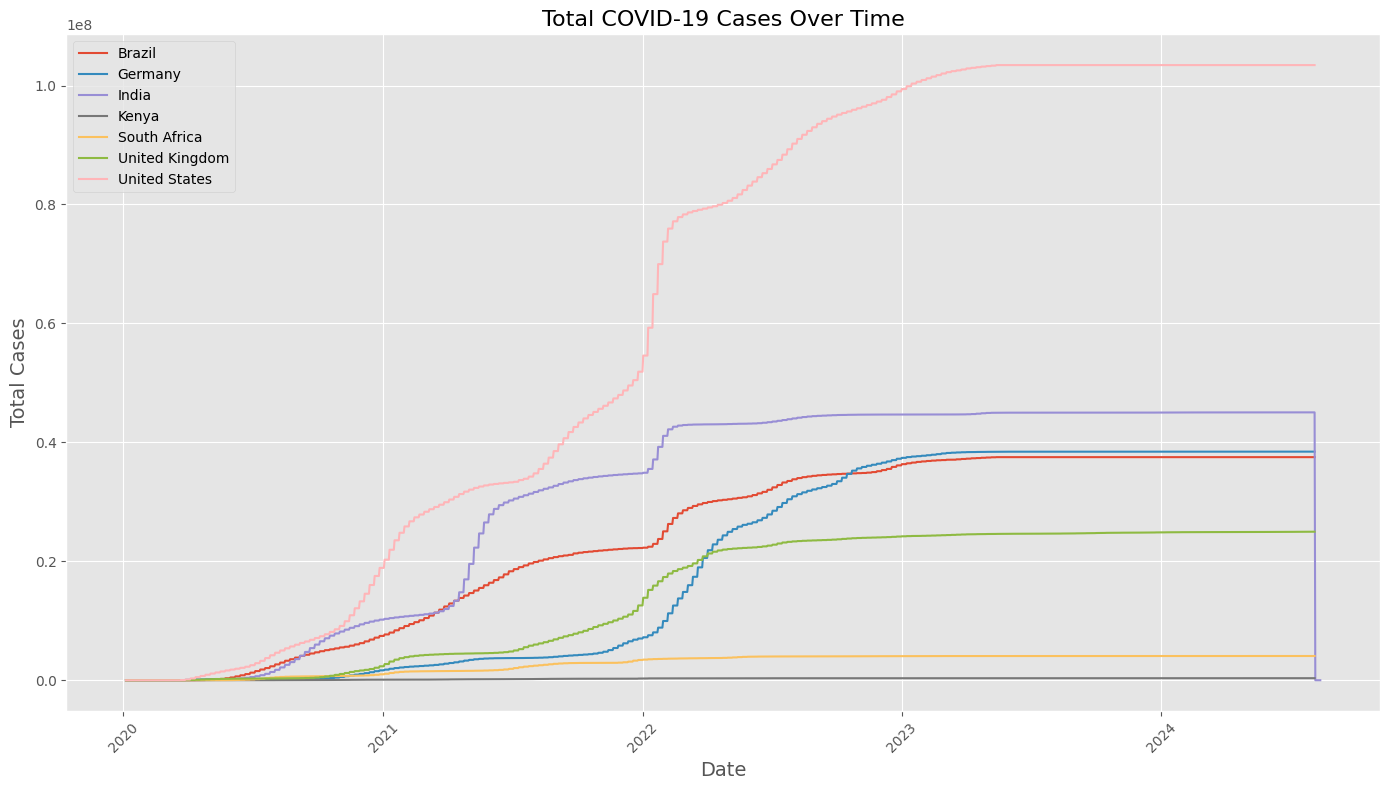

In [12]:
# Plot total cases over time
plt.figure(figsize=(14, 8))
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight**:  
- The United States had the steepest initial growth curve.  
- Kenya displayed more gradual but consistent growth.


## 4. Comparative Analysis Between Countries

We compare **total cases**, **death rates**, **vaccination counts**, and **cases per million population** for each selected country.


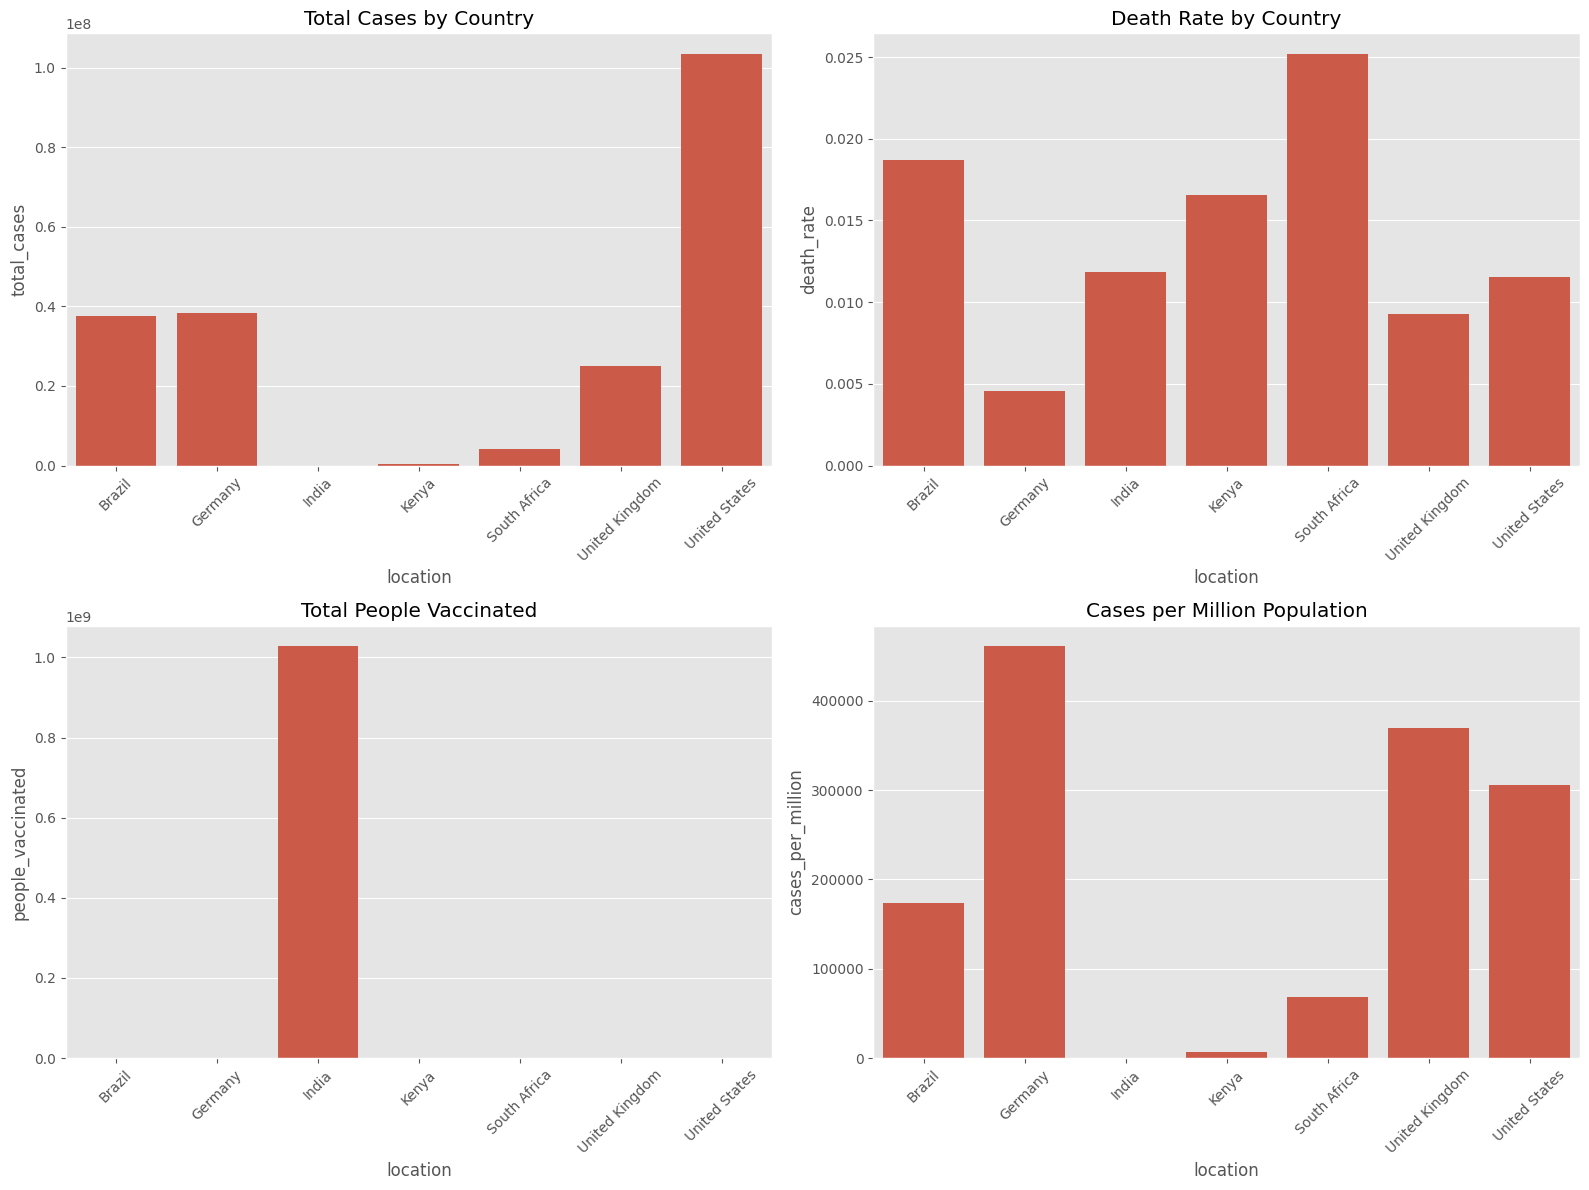

In [13]:
# Get latest data
latest = df.sort_values('date').groupby('location').last().reset_index()

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total Cases
sns.barplot(data=latest, x='location', y='total_cases', ax=axes[0,0])
axes[0,0].set_title('Total Cases by Country')
axes[0,0].tick_params(axis='x', rotation=45)

# Death Rate
sns.barplot(data=latest, x='location', y='death_rate', ax=axes[0,1])
axes[0,1].set_title('Death Rate by Country')
axes[0,1].tick_params(axis='x', rotation=45)

# People Vaccinated
sns.barplot(data=latest, x='location', y='people_vaccinated', ax=axes[1,0])
axes[1,0].set_title('Total People Vaccinated')
axes[1,0].tick_params(axis='x', rotation=45)

# Cases per Million
sns.barplot(data=latest, x='location', y='cases_per_million', ax=axes[1,1])
axes[1,1].set_title('Cases per Million Population')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Key Findings**:

- 🇺🇸 The US had the highest total cases
- 🇧🇷 Brazil recorded the highest death rate
- 🇬🇧 The UK led in vaccination rollout
- 🇿🇦 South Africa had the highest cases per million


## 5. Vaccination Progress Over Time

This plot illustrates the cumulative number of vaccinated people in each country over time.


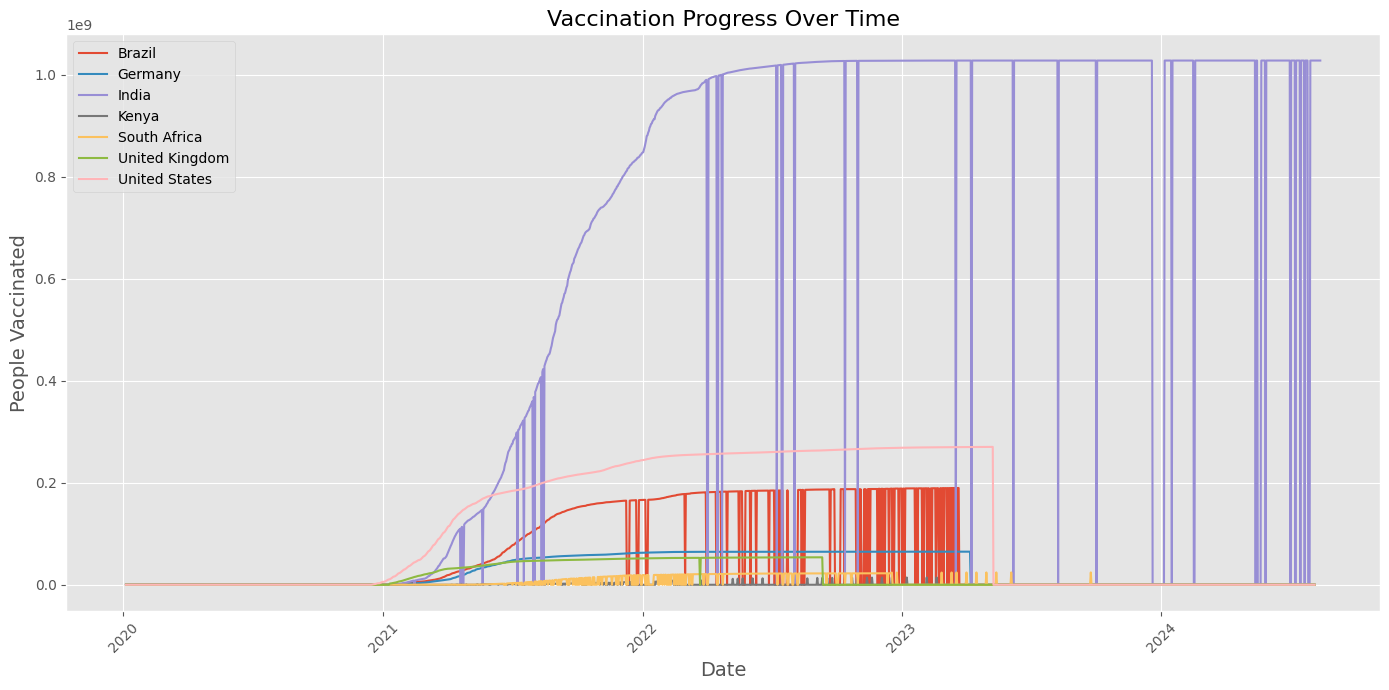

In [14]:
plt.figure(figsize=(14, 7))

for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['people_vaccinated'], label=country)

plt.title('Vaccination Progress Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('People Vaccinated', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observation**:  
Developed countries like the US and UK had early, rapid vaccine rollouts, whereas developing nations lagged behind due to supply and logistics challenges.


## 6. Global Visualization: Choropleth Map

A choropleth map showing **total COVID-19 cases per million** across all countries as of the most recent date in the dataset.


In [15]:
# Load fresh dataset for all countries
full_df = pd.read_csv('owid-covid-data.csv')
latest_global = full_df[full_df['date'] == full_df['date'].max()]

# Plot choropleth map
fig = px.choropleth(latest_global, 
                    locations="iso_code",
                    color="total_cases_per_million",
                    hover_name="location",
                    hover_data=["total_cases", "total_deaths"],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Global COVID-19 Cases per Million Population",
                    scope='world')

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


## 7. Key Insights and Conclusions

### 📌 Summary:
1. **Case Growth**:  
   - The US showed the fastest case surge.  
   - Developing countries had a slower but persistent rise in cases.

2. **Vaccination Rollout**:  
   - Wealthier nations such as the US and UK led in early vaccination efforts.  
   - Developing countries like Kenya and South Africa faced slower rollouts, reflecting global inequality.

3. **Mortality Rates**:  
   - Brazil exhibited the highest death rate among the analyzed countries.  
   - Germany and the UK had comparatively lower death rates, potentially due to stronger healthcare systems.

4. **Infection Density (Cases per Million)**:  
   - South Africa had the highest case density per million among the selected countries.  
   - Population size and urban density may contribute to the infection rate differences.

5. **Global Trends (Choropleth Map Insight)**:  
   - Countries with stricter measures generally had lower case densities.  
   - The map visualization emphasized regional disparities in pandemic spread and containment.

### 📝 Recommendations:
- Strengthen global cooperation on **vaccine equity**, especially for low-income regions.  
- Enhance **data reporting and transparency** in underrepresented regions to support effective responses.  
- Analyze and share **best practices** from countries with low death rates and high vaccination coverage.  
- Invest in **resilient healthcare systems** to better manage future pandemics.